In [54]:
#Importamos las librerías necesarias
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import eli5
from eli5.sklearn import PermutationImportance

import IPython.display as ipd

In [16]:
#Ruta del proyecto
ruta = "C:/Users/Gabriel/OneDrive - Pontificia Universidad Javeriana/Trabajos_pontifarras/Septimo_Semestre/Analisis_de_Datos/Proyecto/analisis_musical/"

**GRÁFICAS DE FORMA DE ONDA**

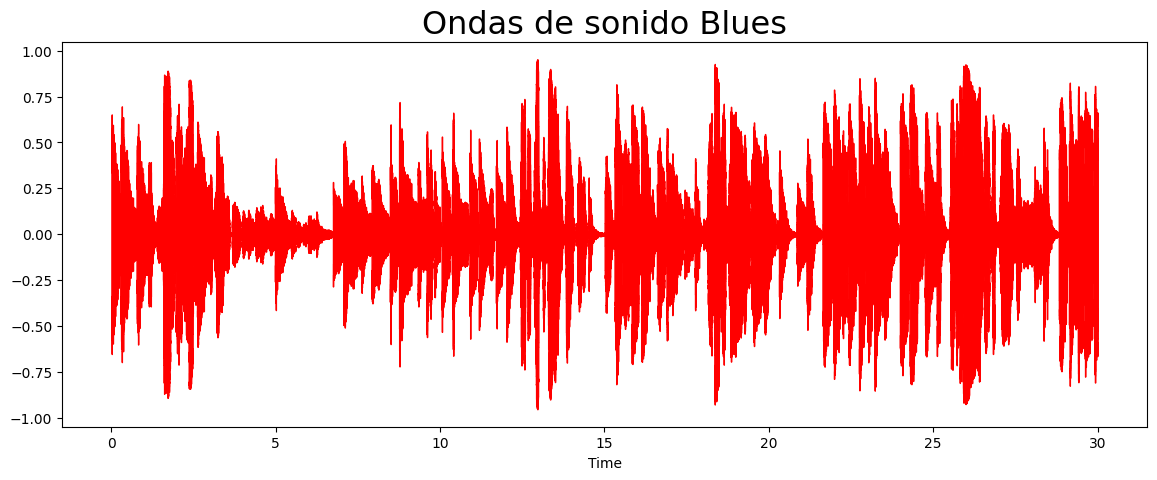

In [18]:
#Forma de onda para Blues
path = ruta + "canciones/blues.00006.wav"
plt.figure(figsize=(14,5))
plt.title("Ondas de sonido Blues", fontsize = 23)
onda, sr = librosa.load(path)
librosa.display.waveshow(onda, sr=sr, color="red")

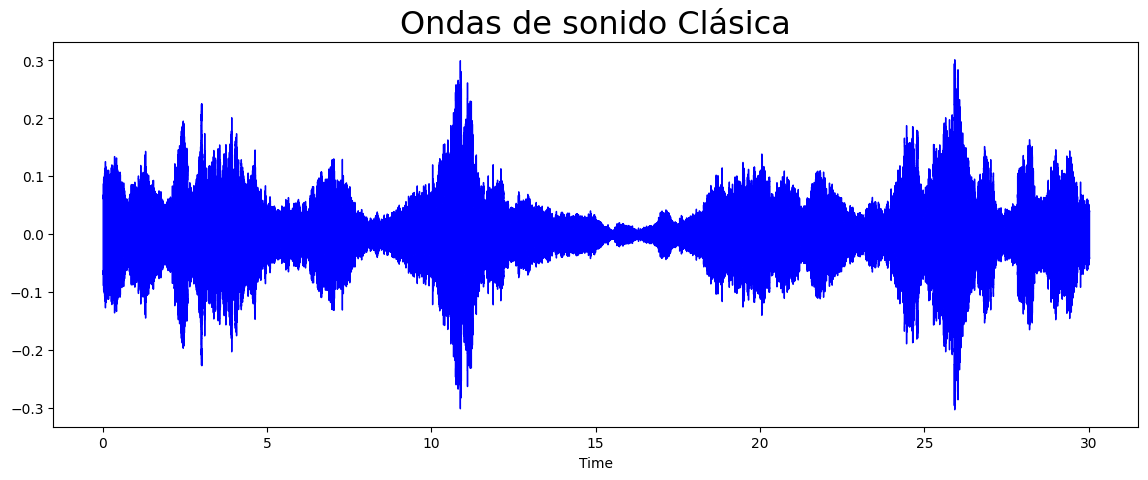

In [36]:
#Forma de onda para Clásica
path = ruta + "canciones/classical.00003.wav"
plt.figure(figsize=(14,5))
plt.title("Ondas de sonido Clásica", fontsize = 23)
onda, sr = librosa.load(path)
librosa.display.waveshow(onda, sr=sr, color="blue")

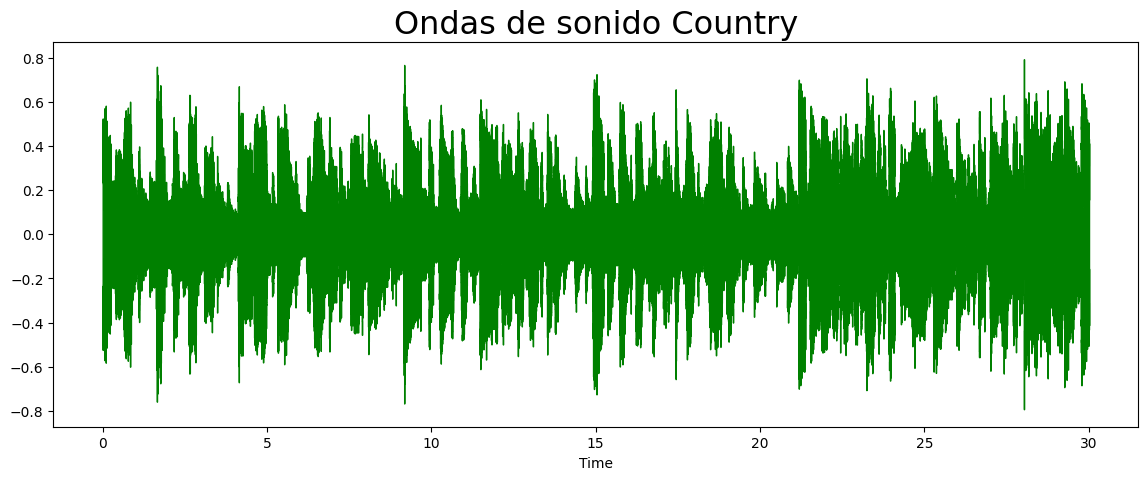

In [37]:
#Forma de onda para Country
path = ruta + "canciones/country.00012.wav"
plt.figure(figsize=(14,5))
plt.title("Ondas de sonido Country", fontsize = 23)
onda, sr = librosa.load(path)
librosa.display.waveshow(onda, sr=sr, color="green")

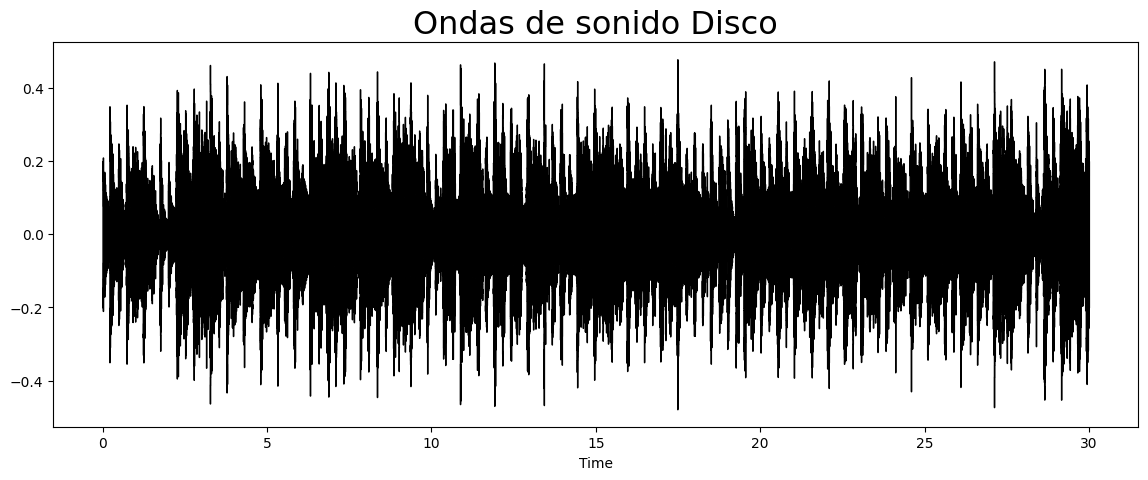

In [38]:
#Forma de onda para Disco
path = ruta + "canciones/disco.00057.wav"
plt.figure(figsize=(14,5))
plt.title("Ondas de sonido Disco", fontsize = 23)
onda, sr = librosa.load(path)
librosa.display.waveshow(onda, sr=sr, color="black")

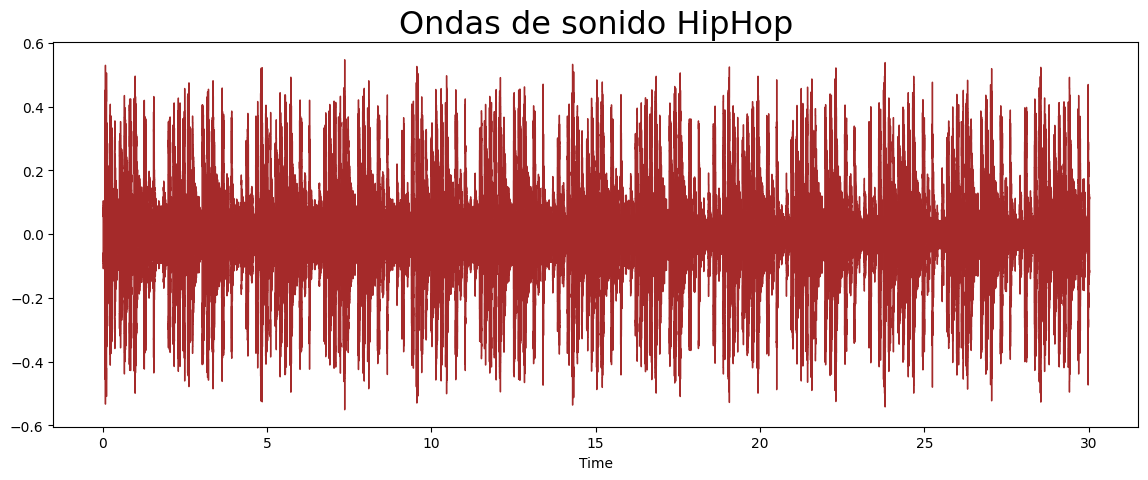

In [39]:
#Forma de onda para HipHop
path = ruta + "canciones/hiphop.00087.wav"
plt.figure(figsize=(14,5))
plt.title("Ondas de sonido HipHop", fontsize = 23)
onda, sr = librosa.load(path)
librosa.display.waveshow(onda, sr=sr, color="brown")

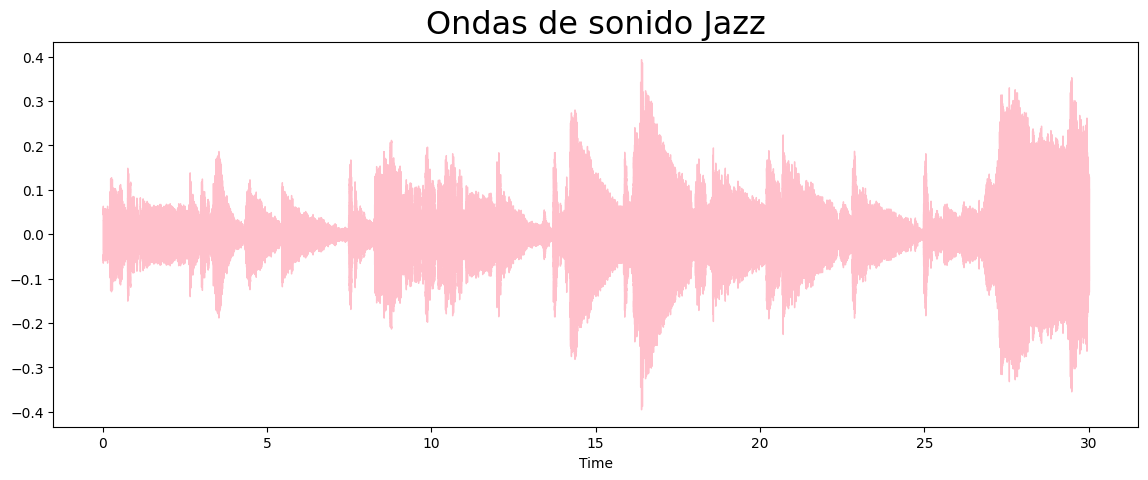

In [40]:
#Forma de onda para Jazz
path = ruta + "canciones/jazz.00089.wav"
plt.figure(figsize=(14,5))
plt.title("Ondas de sonido Jazz", fontsize = 23)
onda, sr = librosa.load(path)
librosa.display.waveshow(onda, sr=sr, color="pink")

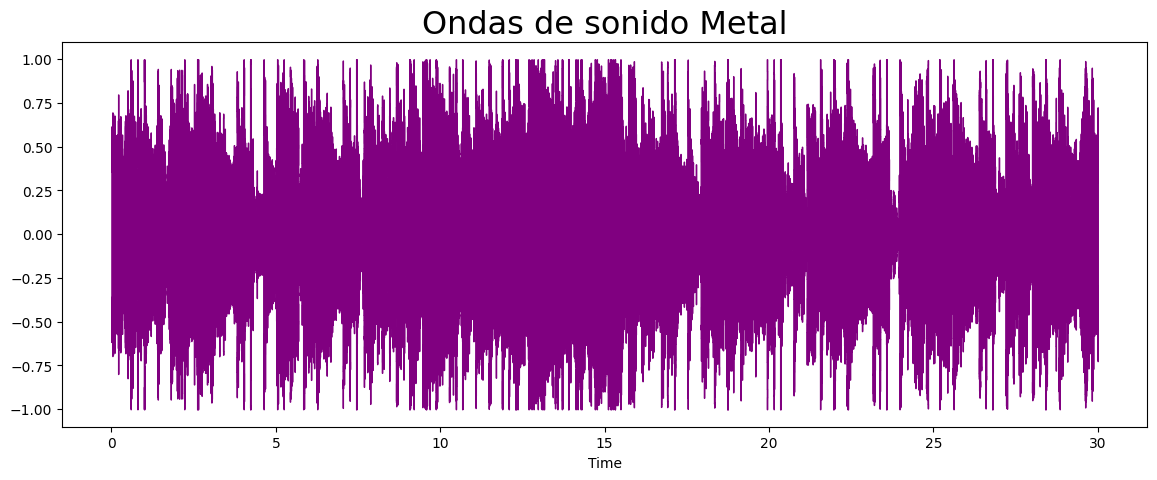

In [41]:
#Forma de onda para Metal
path = ruta + "canciones/metal.00084.wav"
plt.figure(figsize=(14,5))
plt.title("Ondas de sonido Metal", fontsize = 23)
onda, sr = librosa.load(path)
librosa.display.waveshow(onda, sr=sr, color="purple")

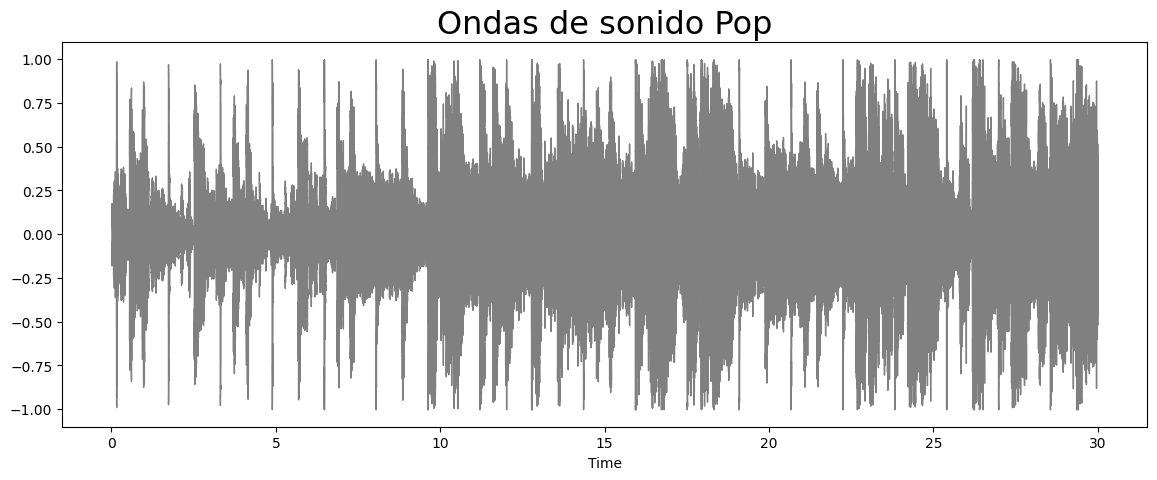

In [42]:
#Forma de onda para Pop
path = ruta + "canciones/pop.00026.wav"
plt.figure(figsize=(14,5))
plt.title("Ondas de sonido Pop", fontsize = 23)
onda, sr = librosa.load(path)
librosa.display.waveshow(onda, sr=sr, color="grey")

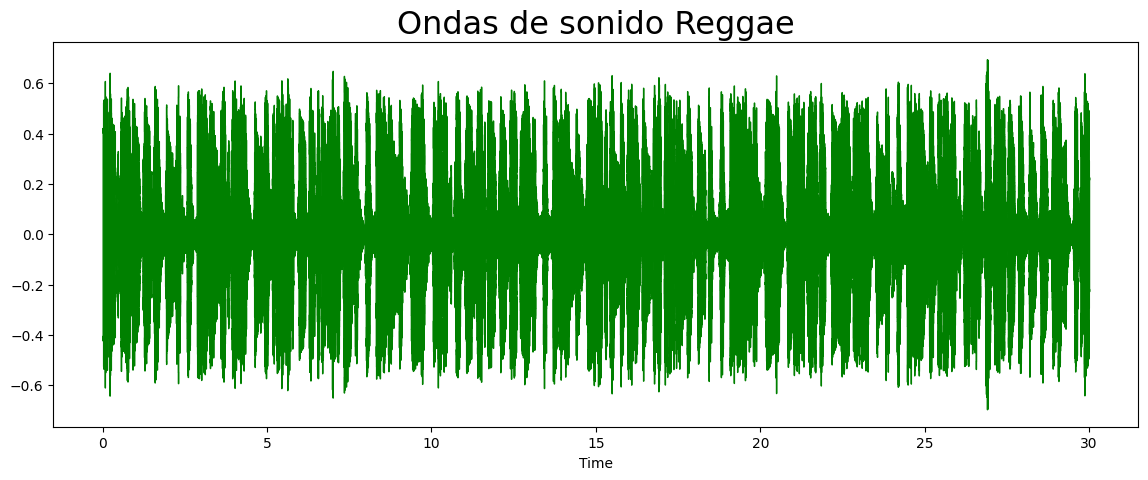

In [43]:
#Forma de onda para Reggae
path = ruta + "canciones/reggae.00096.wav"
plt.figure(figsize=(14,5))
plt.title("Ondas de sonido Reggae", fontsize = 23)
onda, sr = librosa.load(path)
librosa.display.waveshow(onda, sr=sr, color="green")

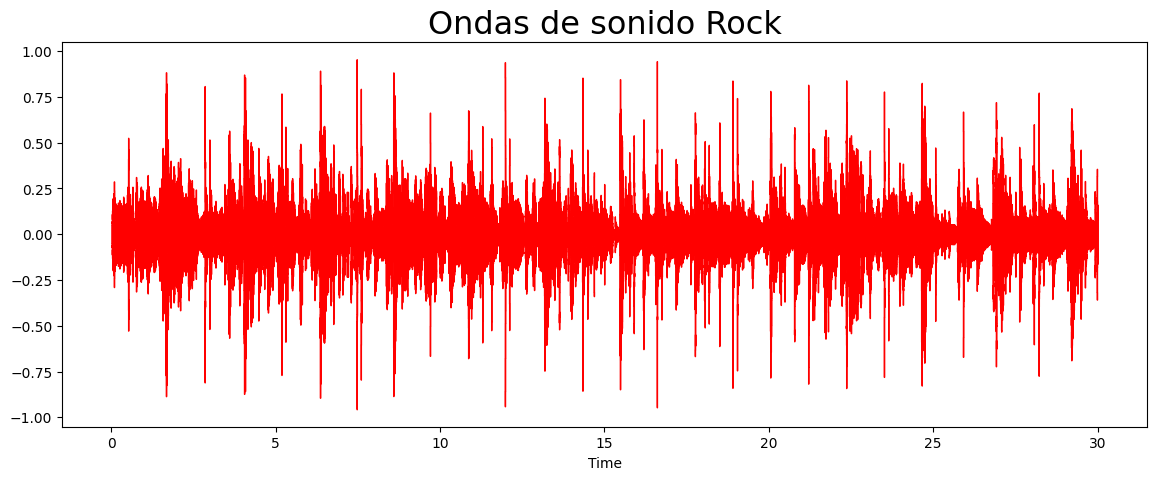

In [44]:
#Forma de onda para Rock
path = ruta + "canciones/rock.00015.wav"
plt.figure(figsize=(14,5))
plt.title("Ondas de sonido Rock", fontsize = 23)
onda, sr = librosa.load(path)
librosa.display.waveshow(onda, sr=sr, color="red")

**ARMONÍAS Y PERCUSIONES**

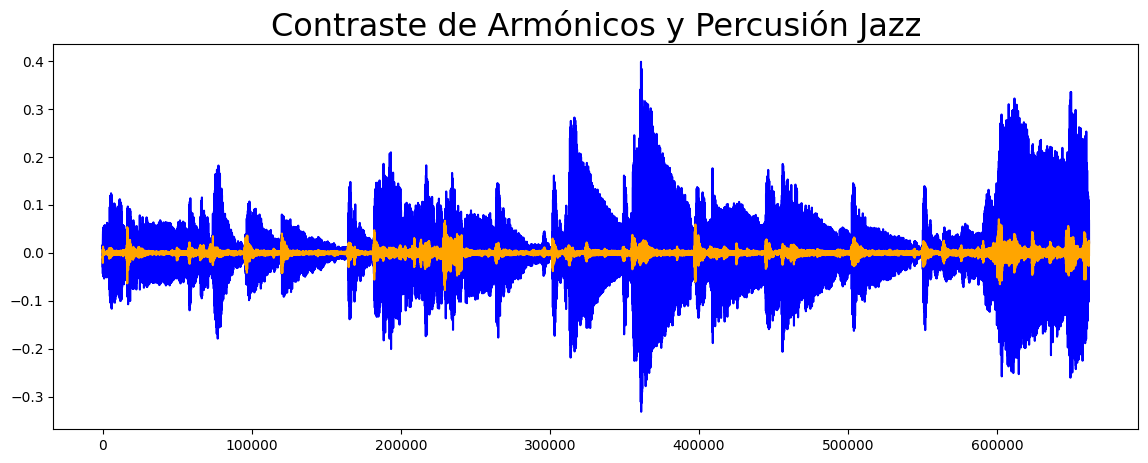

In [45]:
#Armonía y percusión Jazz
path = ruta + "canciones/jazz.00089.wav"
onda, sr = librosa.load(path)
harm, perc = librosa.effects.hpss(onda)
plt.figure(figsize=(14,5))
plt.title("Contraste de Armónicos y Percusión Jazz", fontsize = 23)
plt.plot(harm, color = "blue");
plt.plot(perc, color = "orange");

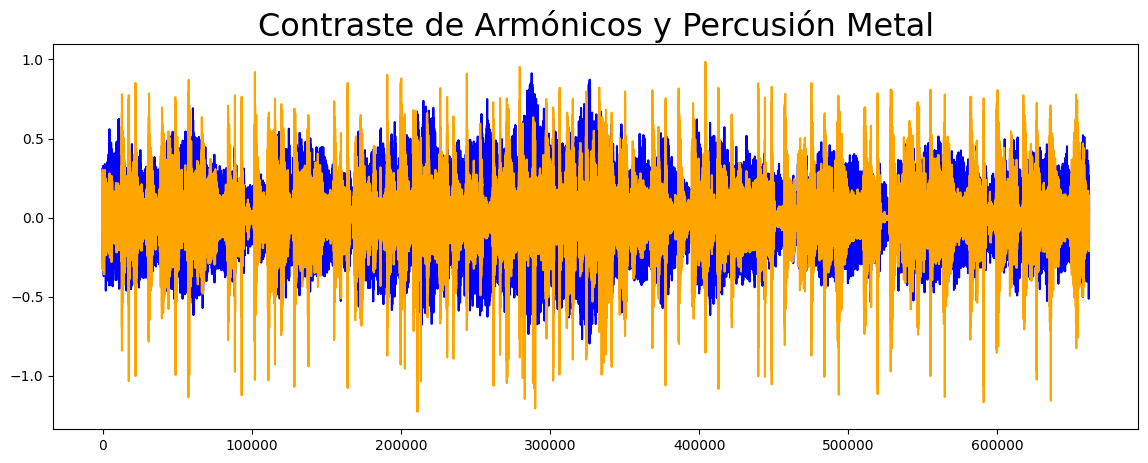

In [46]:
#Armonía y percusión Metal
path = ruta + "canciones/metal.00084.wav"
onda, sr = librosa.load(path)
harm, perc = librosa.effects.hpss(onda)
plt.figure(figsize=(14,5))
plt.title("Contraste de Armónicos y Percusión Metal", fontsize = 23)
plt.plot(harm, color = "blue");
plt.plot(perc, color = "orange");

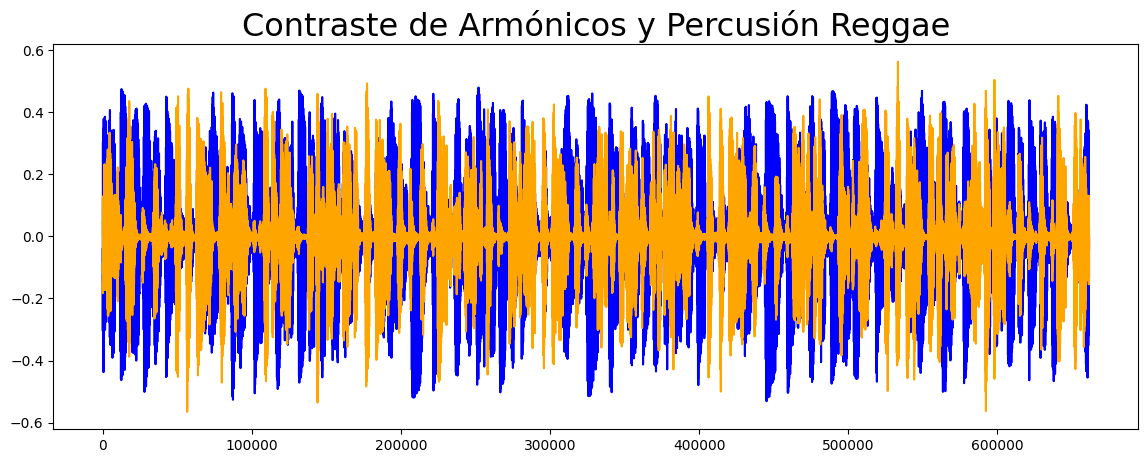

In [47]:
#Armonía y percusión Reggae
path = ruta + "canciones/reggae.00096.wav"
onda, sr = librosa.load(path)
harm, perc = librosa.effects.hpss(onda)
plt.figure(figsize=(14,5))
plt.title("Contraste de Armónicos y Percusión Reggae", fontsize = 23)
plt.plot(harm, color = "blue");
plt.plot(perc, color = "orange");

**CLASIFICACIÓN**

In [55]:
#Cargamos los datos
path = ruta + "datos/features_30_sec.csv"
data_m = pd.read_csv(path)

# Eliminar la columna de duración
data_m = data_m.drop('length', axis=1)
data_m.head()

,filename,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


Mapa de calor para las medias

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5]),
 [Text(0, 0.5, 'chroma_stft_mean'),
  Text(0, 2.5, 'spectral_centroid_mean'),
  Text(0, 4.5, 'rolloff_mean'),
  Text(0, 6.5, 'harmony_mean'),
  Text(0, 8.5, 'mfcc1_mean'),
  Text(0, 10.5, 'mfcc3_mean'),
  Text(0, 12.5, 'mfcc5_mean'),
  Text(0, 14.5, 'mfcc7_mean'),
  Text(0, 16.5, 'mfcc9_mean'),
  Text(0, 18.5, 'mfcc11_mean'),
  Text(0, 20.5, 'mfcc13_mean'),
  Text(0, 22.5, 'mfcc15_mean'),
  Text(0, 24.5, 'mfcc17_mean'),
  Text(0, 26.5, 'mfcc19_mean')])

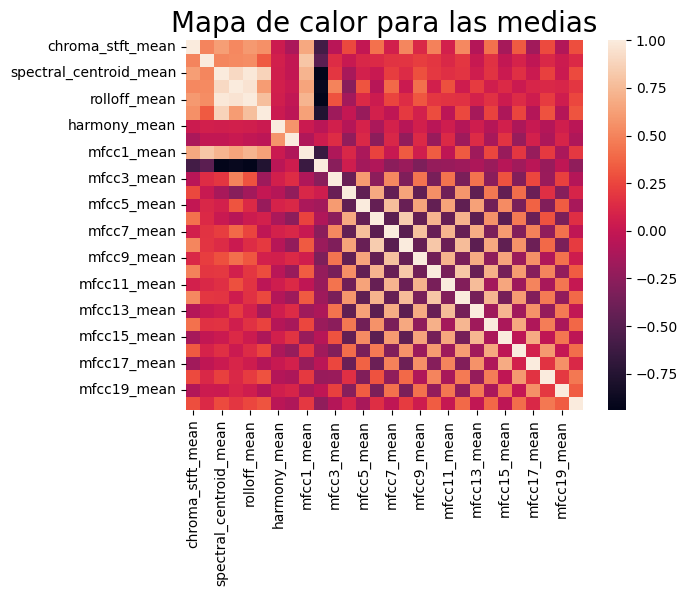

In [49]:
correlacion_m = [col for col in data_m.columns if 'mean' in col]

#Se imprime el mapa
sns.heatmap(data_m[correlacion_m].corr())
plt.title('Mapa de calor para las medias', fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

Distribución por géneros

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_27748\4264767304.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "label", y = "tempo", data = x, palette = 'tab10');


Text(0, 0.5, 'BPM')

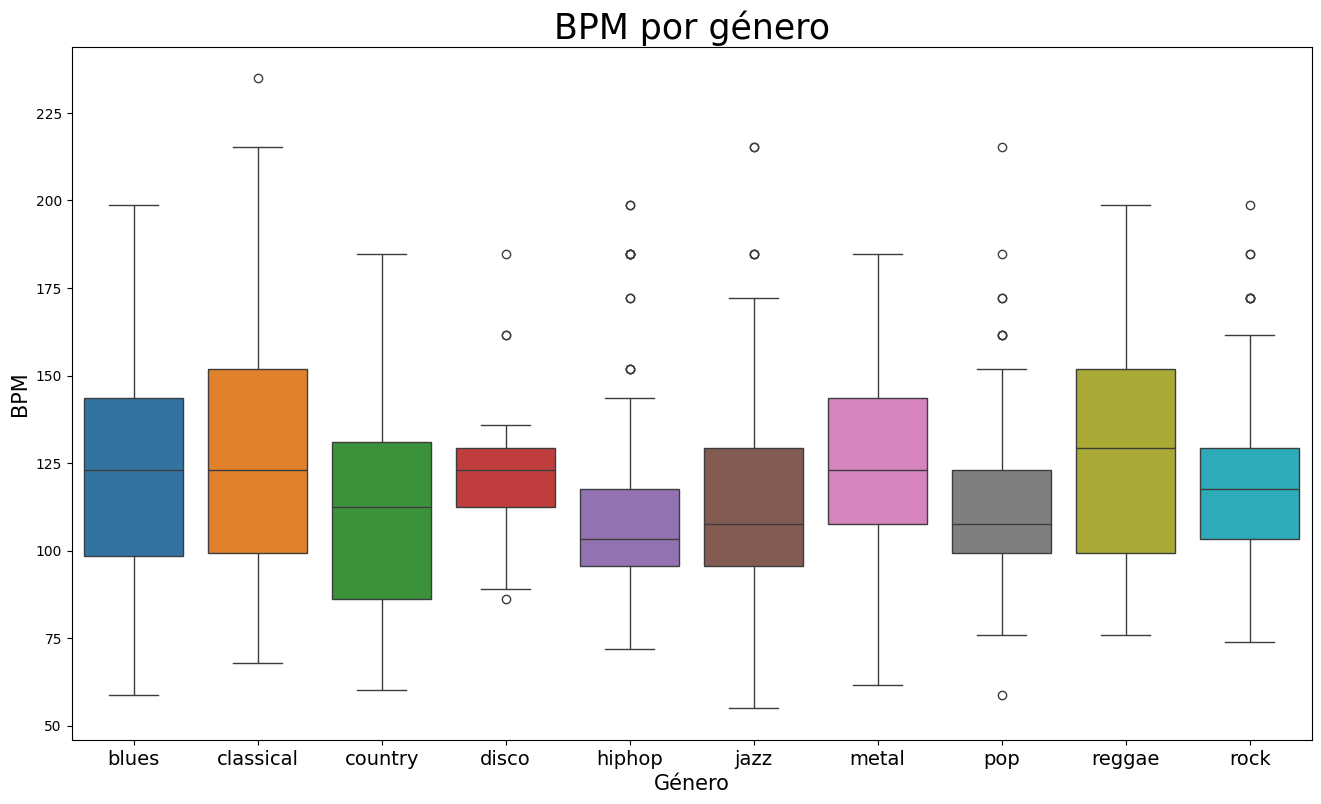

In [50]:
x = data_m[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'tab10');

plt.title('BPM por género', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Género", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)

Entrenamiento de modelos

In [56]:
data_m = data_m.iloc[0:, 1:] 

y = data_m['label'] 
X = data_m.loc[:, data_m.columns != 'label'] 

# Normalizamos 

cols = X.columns
escala = preprocessing.MinMaxScaler()
np_escalada = escala.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_escalada, columns = cols)

# Dividimos los datos en entrenamiento y prueba
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size=0.3, random_state=42)

**PCA**

Text(0, 0.5, 'Componente principal 2')

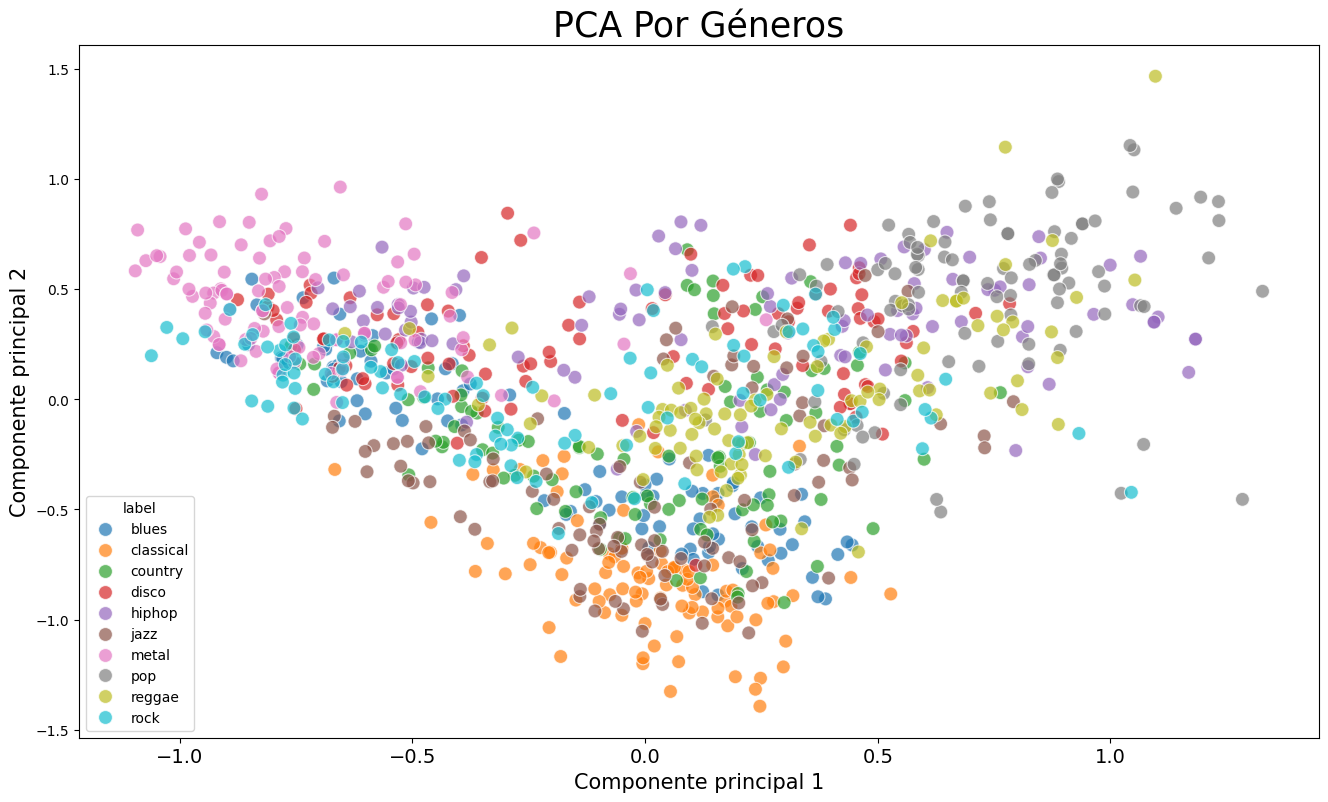

In [60]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7, s = 100);

plt.title('PCA Por Géneros', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Componente principal 1", fontsize = 15)
plt.ylabel("Componente principal 2", fontsize = 15)

Función para revisar la precisión de los modelos

In [52]:
# Definimos una función para probar los modelos y devolver los resultados
def probar(modelo, titulo):
    modelo.fit(X_entreno, y_entreno)
    preds = modelo.predict(X_prueba)
    acc = round(accuracy_score(y_prueba, preds), 5)
    print('Precisión: ', titulo, ':', acc, '\n')
    return modelo, preds, acc

In [53]:
#Graficar matriz de confusión y curva ROC
def graficar_matriz_confusion(y_true, y_pred, titulo):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.ylabel('Verdadero')
    plt.xlabel('Predicho')
    plt.title(f'Matriz de Confusión - {titulo}')
    plt.show()


3 modelos de prueba

Precisión:  KNN : 0.58 



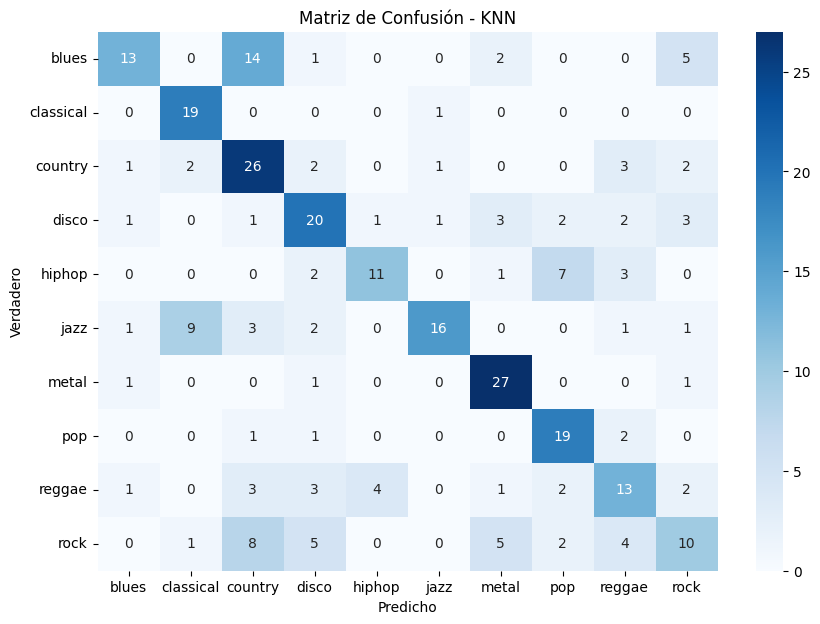

Precisión:  Random Forest : 0.66667 



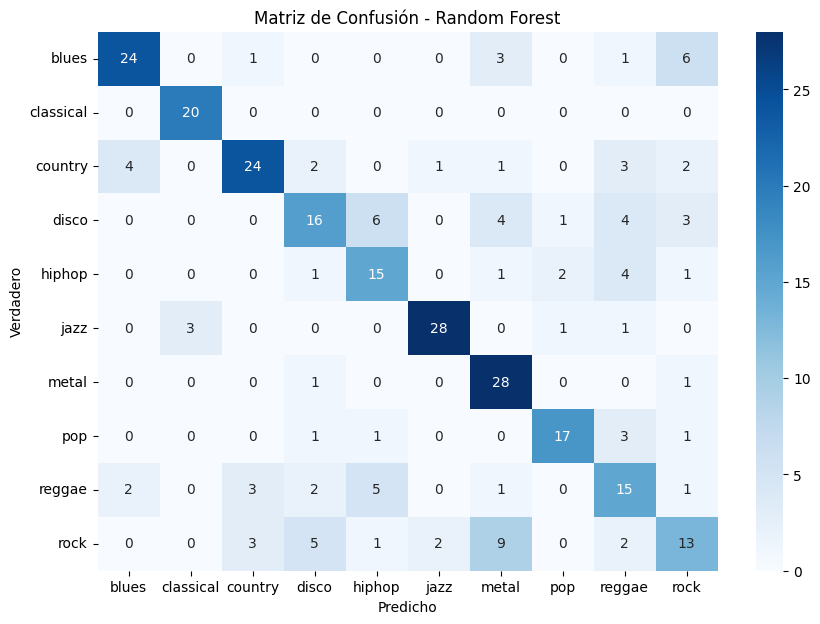

c:\Users\Gabriel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:536: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Precisión:  Neural Nets : 0.53667 



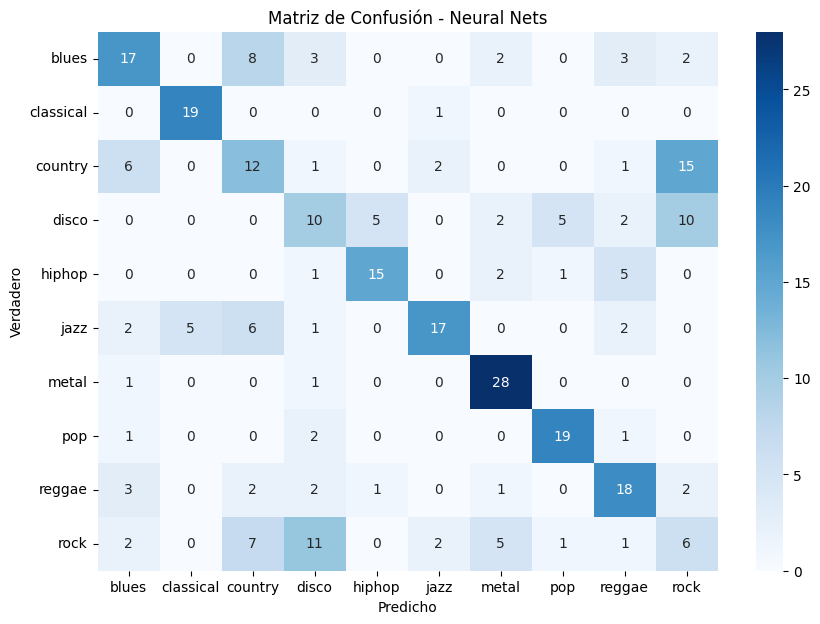

In [28]:
# KNN
knn, preds_knn, acc_knn = probar(KNeighborsClassifier(n_neighbors=19), "KNN")
graficar_matriz_confusion(y_prueba, preds_knn, "KNN")

# Random Forest
forest, preds_forest, acc_forest = probar(RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0), "Random Forest")
graficar_matriz_confusion(y_prueba, preds_forest, "Random Forest")

# Red Neuronal
red_neuronal, preds_red_neuronal, acc_red_neuronal = probar(MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1), "Neural Nets")
graficar_matriz_confusion(y_prueba, preds_red_neuronal, "Neural Nets")

Modelo Final

In [29]:
perm = PermutationImportance(estimator=forest, random_state=1)
perm.fit(X_prueba, y_prueba)

eli5.show_weights(estimator=perm, feature_names = X_prueba.columns.tolist())

Weight,Feature
0.0247 ± 0.0205,chroma_stft_mean
0.0193 ± 0.0098,perceptr_var
0.0187 ± 0.0090,chroma_stft_var
0.0107 ± 0.0098,mfcc8_var
0.0093 ± 0.0122,spectral_centroid_var
0.0093 ± 0.0115,mfcc1_mean
0.0073 ± 0.0050,zero_crossing_rate_var
0.0073 ± 0.0171,mfcc6_var
0.0067 ± 0.0073,rms_var
0.0060 ± 0.0176,mfcc6_mean


Encontrar similitudes (Similitud de coseno)

In [61]:
# Extraemos los labels
labels = data_m[['label']]

# Eliminamos los labels 
data_m = data_m.drop(columns=['label'])
data_m.head()

# Modificamos los datos
transformacion=preprocessing.scale(data_m)

similaridad = cosine_similarity(transformacion)
print("Similarity shape:", similaridad.shape)

# Convert into a dataframe and then set the row index and column names as labels
sim_df_labels = pd.DataFrame(similaridad)
sim_df_names = sim_df_labels.set_index(labels.index)
sim_df_names.columns = labels.index

sim_df_names.head()

Similarity shape: (1000, 1000)


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.049231,0.589618,0.284862,0.025561,-0.346688,-0.219483,-0.167626,0.641877,-0.097889,...,-0.082829,0.546169,0.578558,0.662590,0.571629,0.610942,0.640835,0.496294,0.284958,0.304098
1,0.049231,1.000000,-0.096834,0.520903,0.080749,0.307856,0.318286,0.415258,0.120649,0.404168,...,-0.098111,-0.325126,-0.370792,-0.191698,-0.330834,-0.077301,-0.222119,-0.302573,0.499562,0.311723
2,0.589618,-0.096834,1.000000,0.210411,0.400266,-0.082019,-0.028061,0.104446,0.468113,-0.132532,...,-0.032408,0.561074,0.590779,0.583293,0.514537,0.495707,0.566837,0.589983,0.216378,0.321069
3,0.284862,0.520903,0.210411,1.000000,0.126437,0.134796,0.300746,0.324566,0.352758,0.295184,...,-0.320107,-0.206516,-0.151132,0.041986,-0.172515,-0.000287,0.020515,-0.107821,0.502279,0.183210
4,0.025561,0.080749,0.400266,0.126437,1.000000,0.556066,0.482195,0.623455,0.029703,0.471657,...,0.087605,0.017366,0.138035,0.104684,-0.034594,0.063454,0.063546,0.172944,0.153192,0.061785


**IMPLEMENTACIÓN**

In [63]:
def buscar_canciones(name):

    # Busca las canciones más parecidas
    serie = sim_df_names[name].sort_values(ascending = False)
    
    # No toma en cuenta a las canciones con ellas mismas
    serie = serie.drop(name)
    print("\n*******\nSimilar songs to ", name)
    print(serie.head(5))